# Linear Regression

### Importing packages

In [346]:
import pandas as pd
import seaborn as sns

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [348]:
import statsmodels

In [349]:
from scipy.stats import iqr

In [350]:
import matplotlib as plt

### Loading Dataset

In [351]:
data = pd.read_csv('salary.csv')

In [352]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [353]:
data.isna().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

### Cleaning data

In [354]:
data =data.drop_duplicates()

In [355]:
data['salary'].fillna(data['salary'].mean(),inplace=True)

*Replacing the null value in salary with mean value*

### Correlation of features

In [356]:
import pandas as pd
import numpy as np
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.498485,-0.0696218
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,-0.0483155,0.13238
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,-0.261379,0.0554682
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,-0.263953,0.0356316
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.223827,-0.167068
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,-0.0984242,0.0293106
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0766229,-0.0176389
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,-0.288812,0.0297514
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.128874,-0.622179
Field,-0.498485,-0.0483155,-0.261379,-0.263953,-0.223827,-0.0984242,-0.0766229,-0.288812,-0.128874,1,-0.000126793


*The above correlation map shows the strength and the direction
of a linear relationship between two variables.
From it we can tell which features are 
worth investigating with the intention to predict the salaries earned by individuals.
The highest correlation with regards to salary is position followed by 
yearsworked then Years worked at current rank .*


*Looking at Salary as our target variable and Yearsworked as the independent variable*

### Splitting Data

In [357]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#### Let’s split this data into labels and features.

In [358]:
y = data.salary
x = data

#### Then, we split the data.

In [359]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [360]:
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


In [361]:
from scipy import stats
from scipy.stats import pearsonr

In [362]:
stats.pearsonr(x_train['yearsworked'],x_train['salary'])

(0.6060480089102416, 2.266003579671186e-37)

*The correlation coefficient is 0.6060480089102416 which shows a positive relationship between the years worked*
*Saying that the null hypothesis in this case is :*
    **The relationship between years worked and salary is not statistically significant.**
*The p-value is 1.274779518969558e-56 and p<0.005.*
*This implies that the correlation coefficient is statistically 
significant and thus rejecting the null hypothesis.*

*Due to the above findings, then it is worth it to build a linear regression model to predict the salaries earned by yearsworked.*

### Examining the training data

#### unique values

In [363]:
x_train.shape

(359, 11)

*The data has been examined at the beginning.There are no missing and null values in the training data set. The training data has 70% of the total Data set*

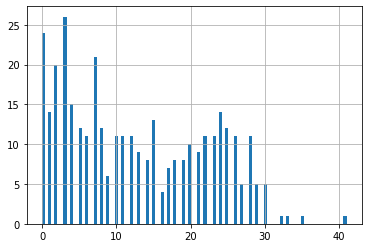

In [364]:
x_train['yearsworked'].hist(bins=100)

In [365]:
# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

In [366]:
f, axes = plt.subplots(1, 2,figsize=(25, 15))
axs[0].hist(x, bins=10)
axs[1].hist(y, bins=10)

AttributeError: module 'matplotlib' has no attribute 'subplots'

#### extreme values

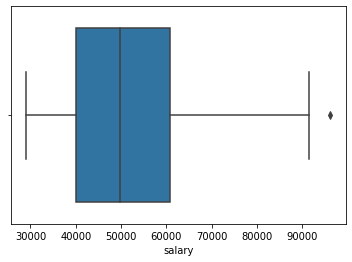

In [266]:
sns.boxplot(x_train['salary'])

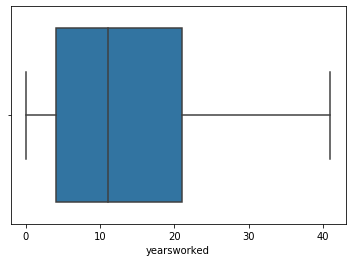

In [313]:
sns.boxplot(x_train['yearsworked'])

*The boxplot above shows that there is one extreme value of salary in the training data set.*
*With that known, one can choose to remedy the outlier because it may cause the outlier can skew the results*

*The outlier is on the further right which is most likely to be on the 99 percentile.*

In [267]:
Q3 = x_train["salary"].quantile(0.9999999)

In [268]:
x_train[(x_train["salary"] > Q3)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


### The scatter plot showing the relationship between salaries and years worked

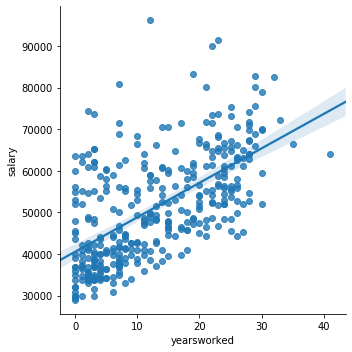

In [269]:
sns.lmplot(x='yearsworked',y='salary',data=x_train)

*The line of best fit shows a strong relationship between years worked and the salary earned. 
There are some outliers.*

In [271]:
IQR =Q3 -Q1

NameError: name 'Q1' is not defined

In [272]:
a=Q1 - (1.5*IQR)

NameError: name 'Q1' is not defined

In [273]:
a

NameError: name 'a' is not defined

In [274]:
b=Q3 +(1.5*IQR)

NameError: name 'IQR' is not defined

In [275]:
df = x_train.query('salary > a & salary < b')

UndefinedVariableError: name 'a' is not defined

In [276]:
x_train[x_train['salary'] > b]

NameError: name 'b' is not defined

In [277]:
x_train[x_train['salary'] <a]

NameError: name 'a' is not defined

## Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [368]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='salary ~ yearsworked', data=x_train).fit()

In [279]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.27e-37
Time:                        11:57:23   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Report the amount of variance explained (R^2) and significance value (p)

In [280]:
print('R-squared is:',model1.rsquared)

R-squared is: 0.3672941891040684


**It reveals that about 37% of the data fit the regression model.**

*Prob(F) statistics test the overall significance of the regression model.*
*The value of Prob(F) is the probability that the null hypothesis for the full model is true.*
*The null hypothesisis that:*
**All of the regression coefficients are zero.**
**The Prob (F-statistic) value is: 2.27e-37<0.05.**
*This low a value would imply that at least some of the regression parameters are nonzero and that
the regression equation does have some validity in fitting the data.* 
**Therefore the null hypothesis can be rejected.**

## What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

## Does the model significantly predict the dependent variable? 


*For this model there is a low R-square and low p-value.*
*This means that the model doesn't explain much of variation of
the data but it is significant which is better than not having a model.*

## What do the 95% confidence intervals [0.025, 0.975] mean?

**A 95% confidence interval is a range of values that you can be 95% certain
that it contains the true mean of the population.**
*Idealy, with regards to the interval,the true population mean value should be on that interval.*
*If a confidence interval does not include a particular value,*
*we can say that it is not likely that the particular value is the true population mean.*
*However, even if a particular value is within the interval,*
*we shouldn't conclude that the population mean equals that specific value.*


*The confidence interval can also be used for coefficients of the regression model*
*Use the confidence interval to assess the estimate of the population coefficient for each term in the model.*

*The coefficient for the years worked is 827.1461.*
*The 95% confidence interval is [714.150,940.143].*
*The coefficient falls on the interval.*
*You can be 95% confident that the confidence interval contains the value of the coefficient for the population.*

*The same applies for the constant coefficient.*

## What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

*The coefficient of 827.1461 means that as the yerasworked variable increases by 1, 
the predicted value of salaries increases by 827.1461 for the observed values.*

## Expected salary for someone with 12 years’ work experience.

In [300]:
experience = pd.DataFrame({'yearsworked':[12]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 12 years experience is:',p,'dollars')


The expected salary of a person with 12 years experience is: 50503.900803185854 dollars


## The expected salary for someone with 80 years’ work experience.

In [311]:
experience = pd.DataFrame({'yearsworked':[80]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 80 years experience is:',p,'dollars')

The expected salary of a person with 80 years experience is: 106749.83660639207 dollars


## Are there any problems with this prediction? If so, what are they?

*There were no problems to make this prediction which is a concern because 80 years
of experince is a rare value prediction in this Regression.*

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

*By the correlation map above, the feature that has a good correlation with salary, 
which is even better than the years worked is position.
Years worked at current rank also has a good correlation with salary. 
The rest of the features have less than 50% correlation with salary.*

## Now fit the model to the test set.

#### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [377]:
predicted=model1.predict(x_test)
predict = pd.DataFrame(predicted,columns =['Predicted salary'])
result = pd.concat([y_test, predict], axis=1, sort=False)

In [378]:
result

,salary,Predicted salary
283,62091.00000,59602.508065
100,42482.00000,48022.462459
37,46292.00000,42232.439656
46,59110.00000,43886.731885
375,89789.00000,58775.361951
...,...,...
326,53686.00000,66219.676983
249,69374.00000,62083.946410
254,70101.78125,59602.508065
5,56000.00000,40578.147426


*Above is the dataframe that shows the actual salaries and the predicted salaries. 
They are different from each other.*

In [384]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [395]:
r=mean_squared_error(y_test,predict)
p=sqrt(r)
print('The RMSE for test set is:',p)

The RMSE for test set is: 9012.148714524605


*For a datum which ranges from 30001.0 to 89789.0 , an RMSE of 9012.148714524605 is small* 

In [388]:
predicted=model1.predict(x_train)

In [396]:
y=mean_squared_error(y_train,predicted)
x=sqrt(y)
print('The RMSE for test set is:',x)

The RMSE for test set is: 10271.059383932115


*For a datum which ranges from 29000.0 to 96156.0 , an RMSE of 10271.059383932115 is small.*

*RMSE measures the average magnitude of the error, therefore it is ideal for the error to be small.
The test set has a very low average error of 9012.148714524605 as compared tothe
train set average error of 10271.059383932115. This explains that there is a huge difference between the two.
The model doesn’t predict new observations as well as it fits the original dataset. 
The results are not generalizable, and there’s a good chance that the model is overfitted.*